### Import basic modules

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

### Import dataset

In [2]:
df = pd.read_csv('data/Dataset.csv')

/tmp/ipykernel_532401/84244152.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/Dataset.csv')


### I/ Data cleansing (and export)
 
Using our speculations, deductions and conclusions in documentation/cleansing.md report, we would like to introduce some cleansing methods for this datasets as shown below. 

In [3]:
import modules.cleansing as cl

df = cl.remove_columns(df, ['PATIENT_TYPE'])
df = cl.remove_invalid_values(df)
df = cl.mapping_bool_values(df=df, excluded_columns=['index', 'USMER', 'MEDICAL_UNIT', 'DATE_DIED', 'AGE', 'CLASIFFICATION_FINAL'])
df_original = df.copy()
df = cl.remove_outliers(df, 'AGE')
df = cl.impute_missing_values(df=df, excluded_columns=['index', 'USMER', 'MEDICAL_UNIT', 'DATE_DIED', 'AGE'])

Q1: 41.0, Q3: 67.0
Lower bound: 2.0, Upper bound: 106.0
Number of rows before removing outliers: 200031
Number of rows after removing outliers: 194343


In [4]:
df.to_csv('data/Dataset_revised_new.csv', index=False)
df.describe()

,index,USMER,MEDICAL_UNIT,SEX,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.943430e+05,194343.000000,194343.000000,194343.000000,194343.000000,194343.000000,194343.000000,194343.000000,194343.000000,194343.000000,194343.000000,194343.000000,194343.000000,194343.000000,194343.000000,194343.000000,194343.000000,194343.000000,194343.000000,194343.000000
mean,3.355391e+05,1.445172,7.362550,1.591876,0.182667,0.605496,54.288732,0.010142,0.302532,0.045703,0.027472,0.037074,0.341859,0.057882,0.050884,0.208312,0.061808,0.087778,4.543426,0.094194
std,2.539972e+05,0.496986,3.680663,0.491488,0.386394,0.488745,17.976931,0.100195,0.459356,0.208840,0.163455,0.188943,0.474334,0.233521,0.219762,0.406102,0.240808,0.282972,1.895725,0.292100
min,2.000000e+00,1.000000,1.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,8.797200e+04,1.000000,4.000000,1.000000,0.000000,0.000000,43.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
50%,3.437230e+05,1.000000,6.000000,2.000000,0.000000,1.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
75%,4.647935e+05,2.000000,12.000000,2.000000,0.000000,1.000000,67.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000
max,1.048571e+06,2.000000,13.000000,2.000000,1.000000,1.000000,105.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000


### II/ Descriptive Statistics and Data Visualisation: 
 


In [5]:
new_column_list = []
for column in df.columns:
    if column not in ['index', 'USMER', 'MEDICAL_UNIT', 'DATE_DIED']:
        new_column_list.append(column)

analytics_df = df[new_column_list].copy()
analytics_df

,SEX,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2.0,1.0,0.0,55,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.0
1,1.0,0.0,1.0,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.0
2,1.0,0.0,0.0,37,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3,0.0
3,1.0,0.0,0.0,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.0
4,2.0,0.0,0.0,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200026,1.0,0.0,1.0,61,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7,0.0
200027,1.0,0.0,1.0,63,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7,0.0
200028,1.0,0.0,0.0,23,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7,0.0
200029,1.0,0.0,0.0,56,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,0.0


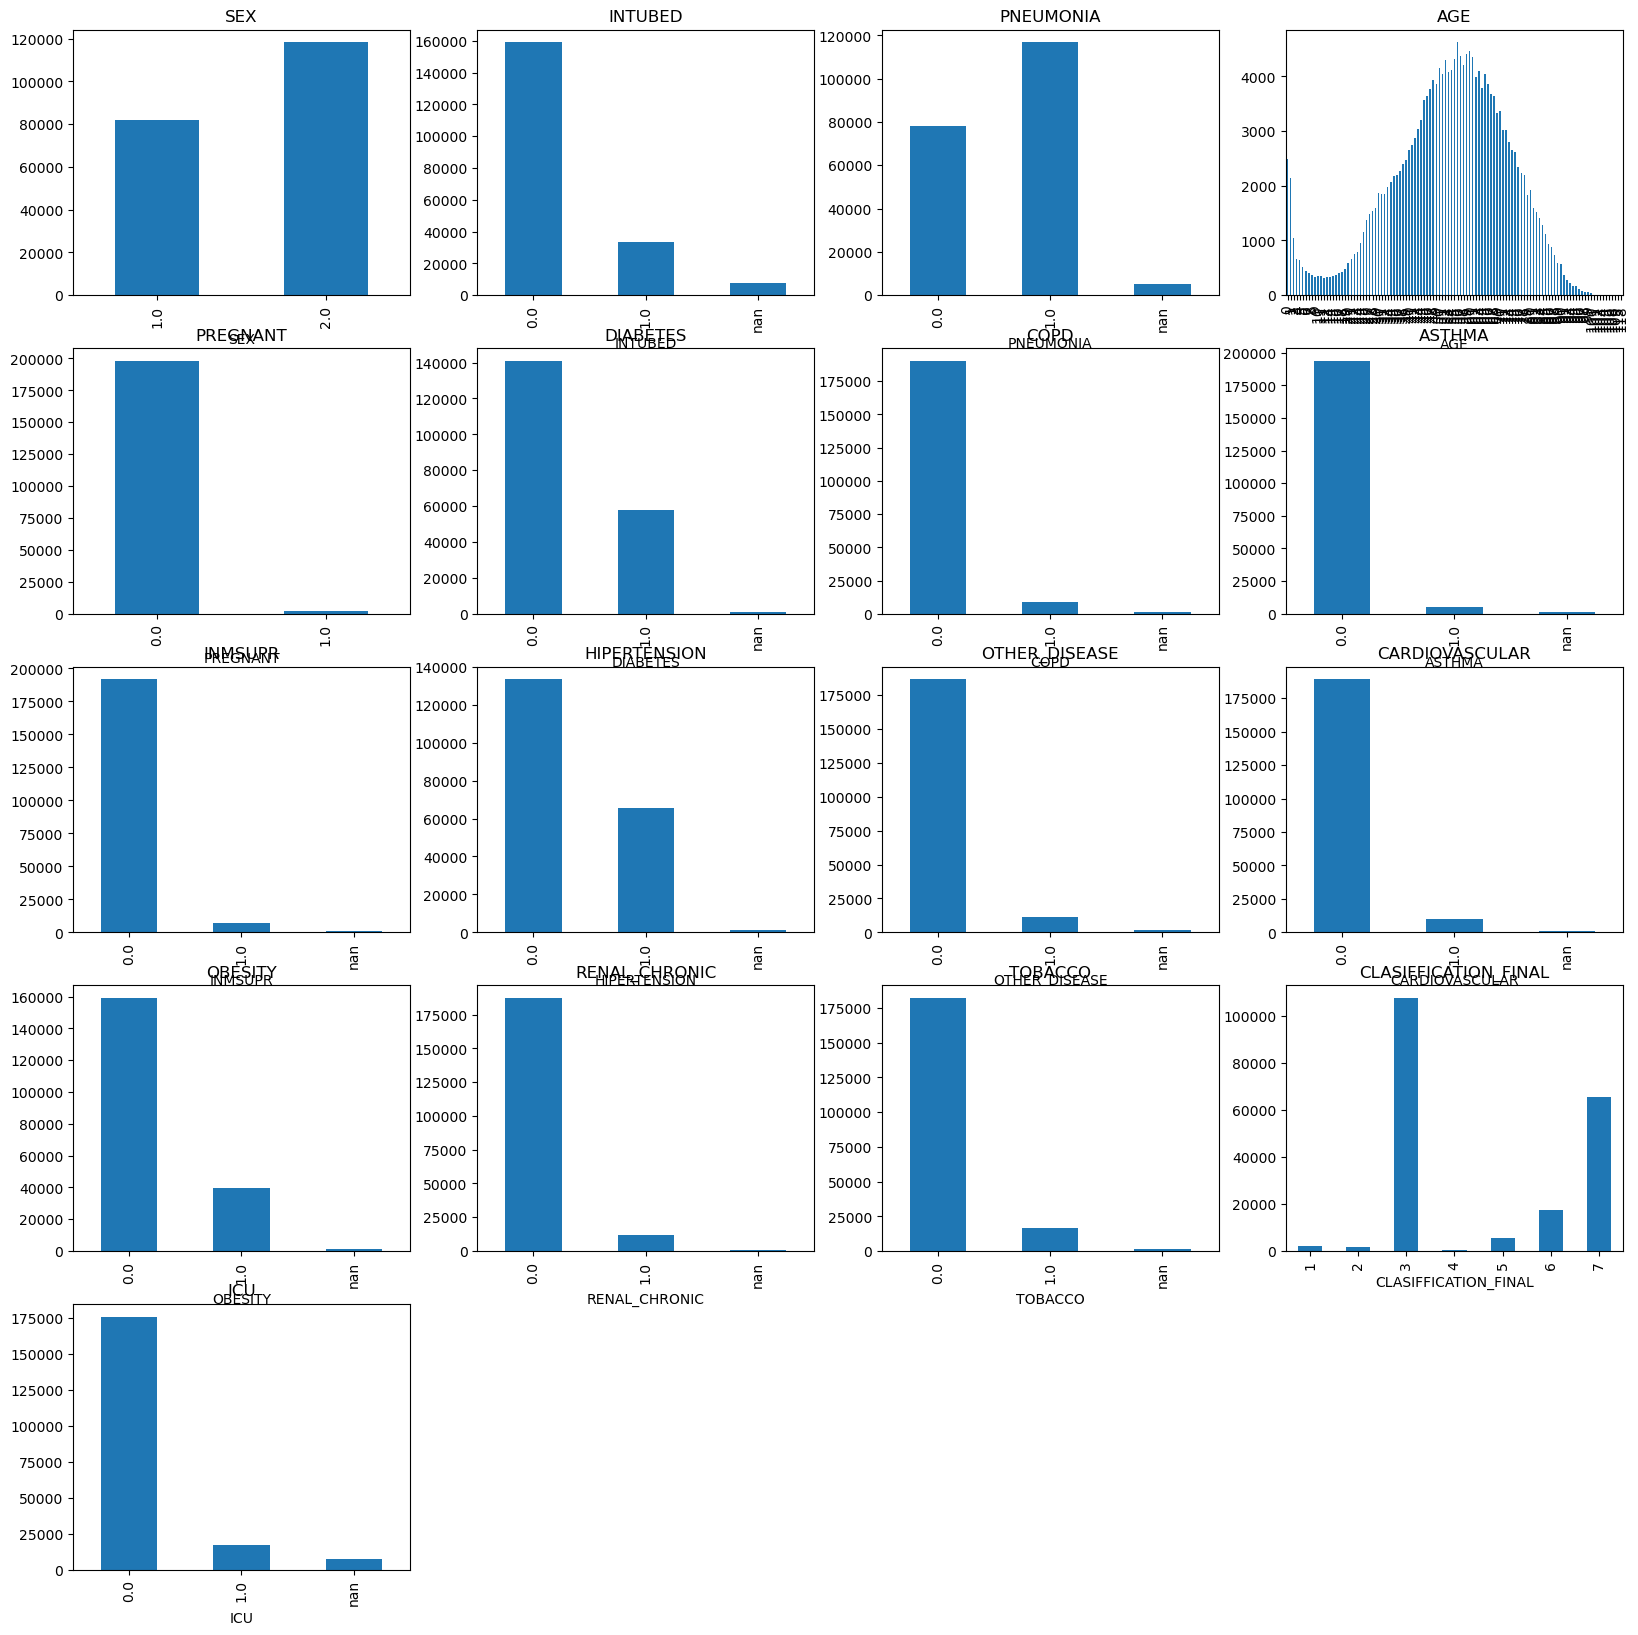

In [6]:
import modules.analytics_helper as ah

org_analytics_df = df_original[new_column_list].copy()
# analytics_df
# print(org_analytics_df['PNEUMONIA'])

ah.plot_multiple_metrics(df=org_analytics_df, columns=new_column_list, figsize=(20, 20))

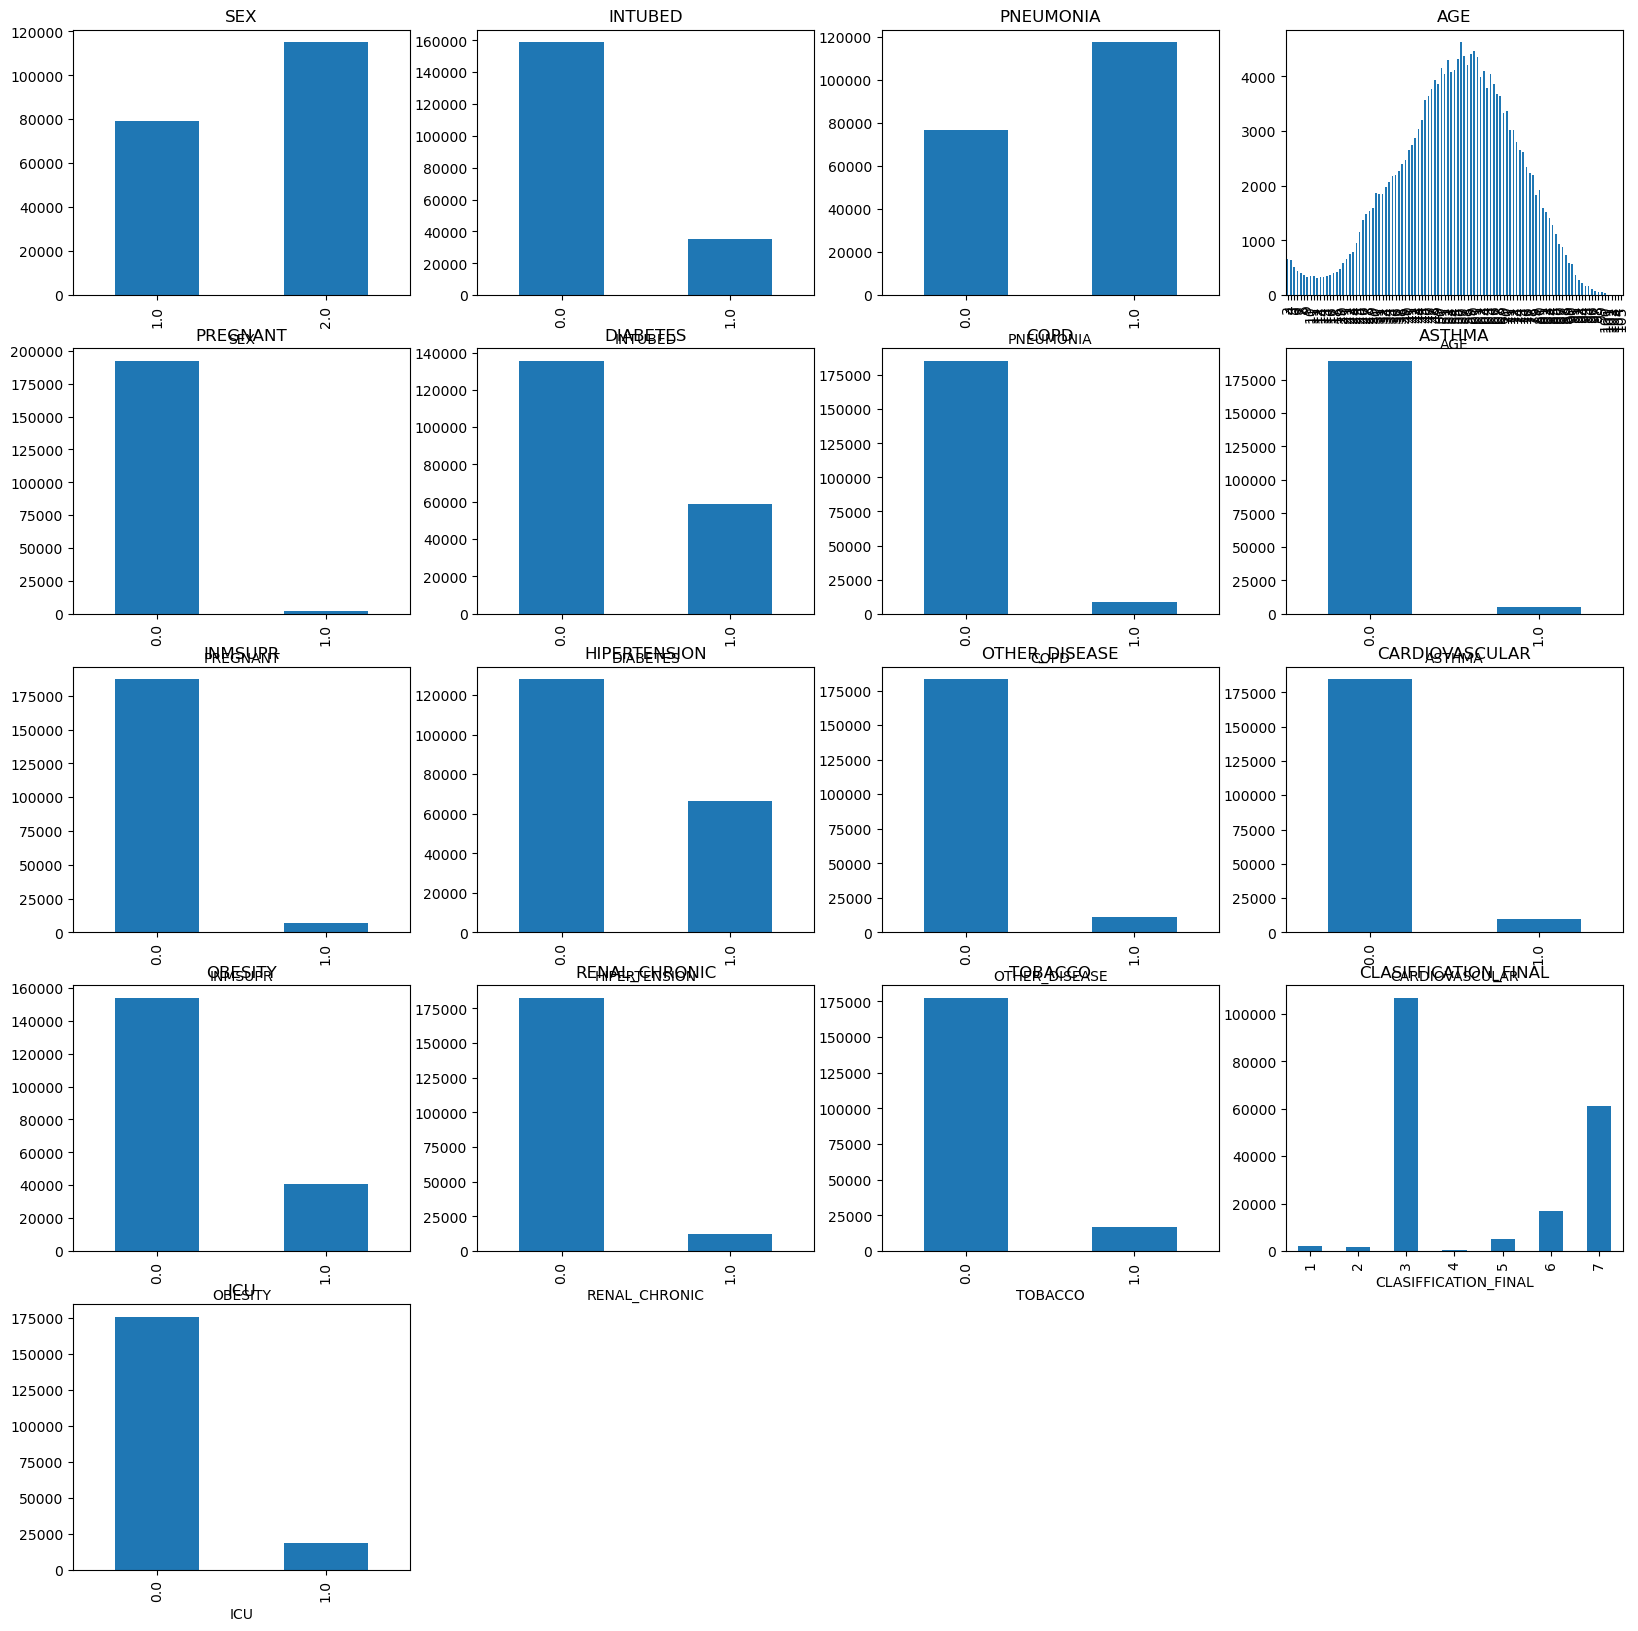

In [7]:
import modules.analytics_helper as ah

ah.plot_multiple_metrics(df=analytics_df, columns=new_column_list, figsize=(20, 20))

<Axes: title={'center': 'AGE'}, xlabel='AGE'>

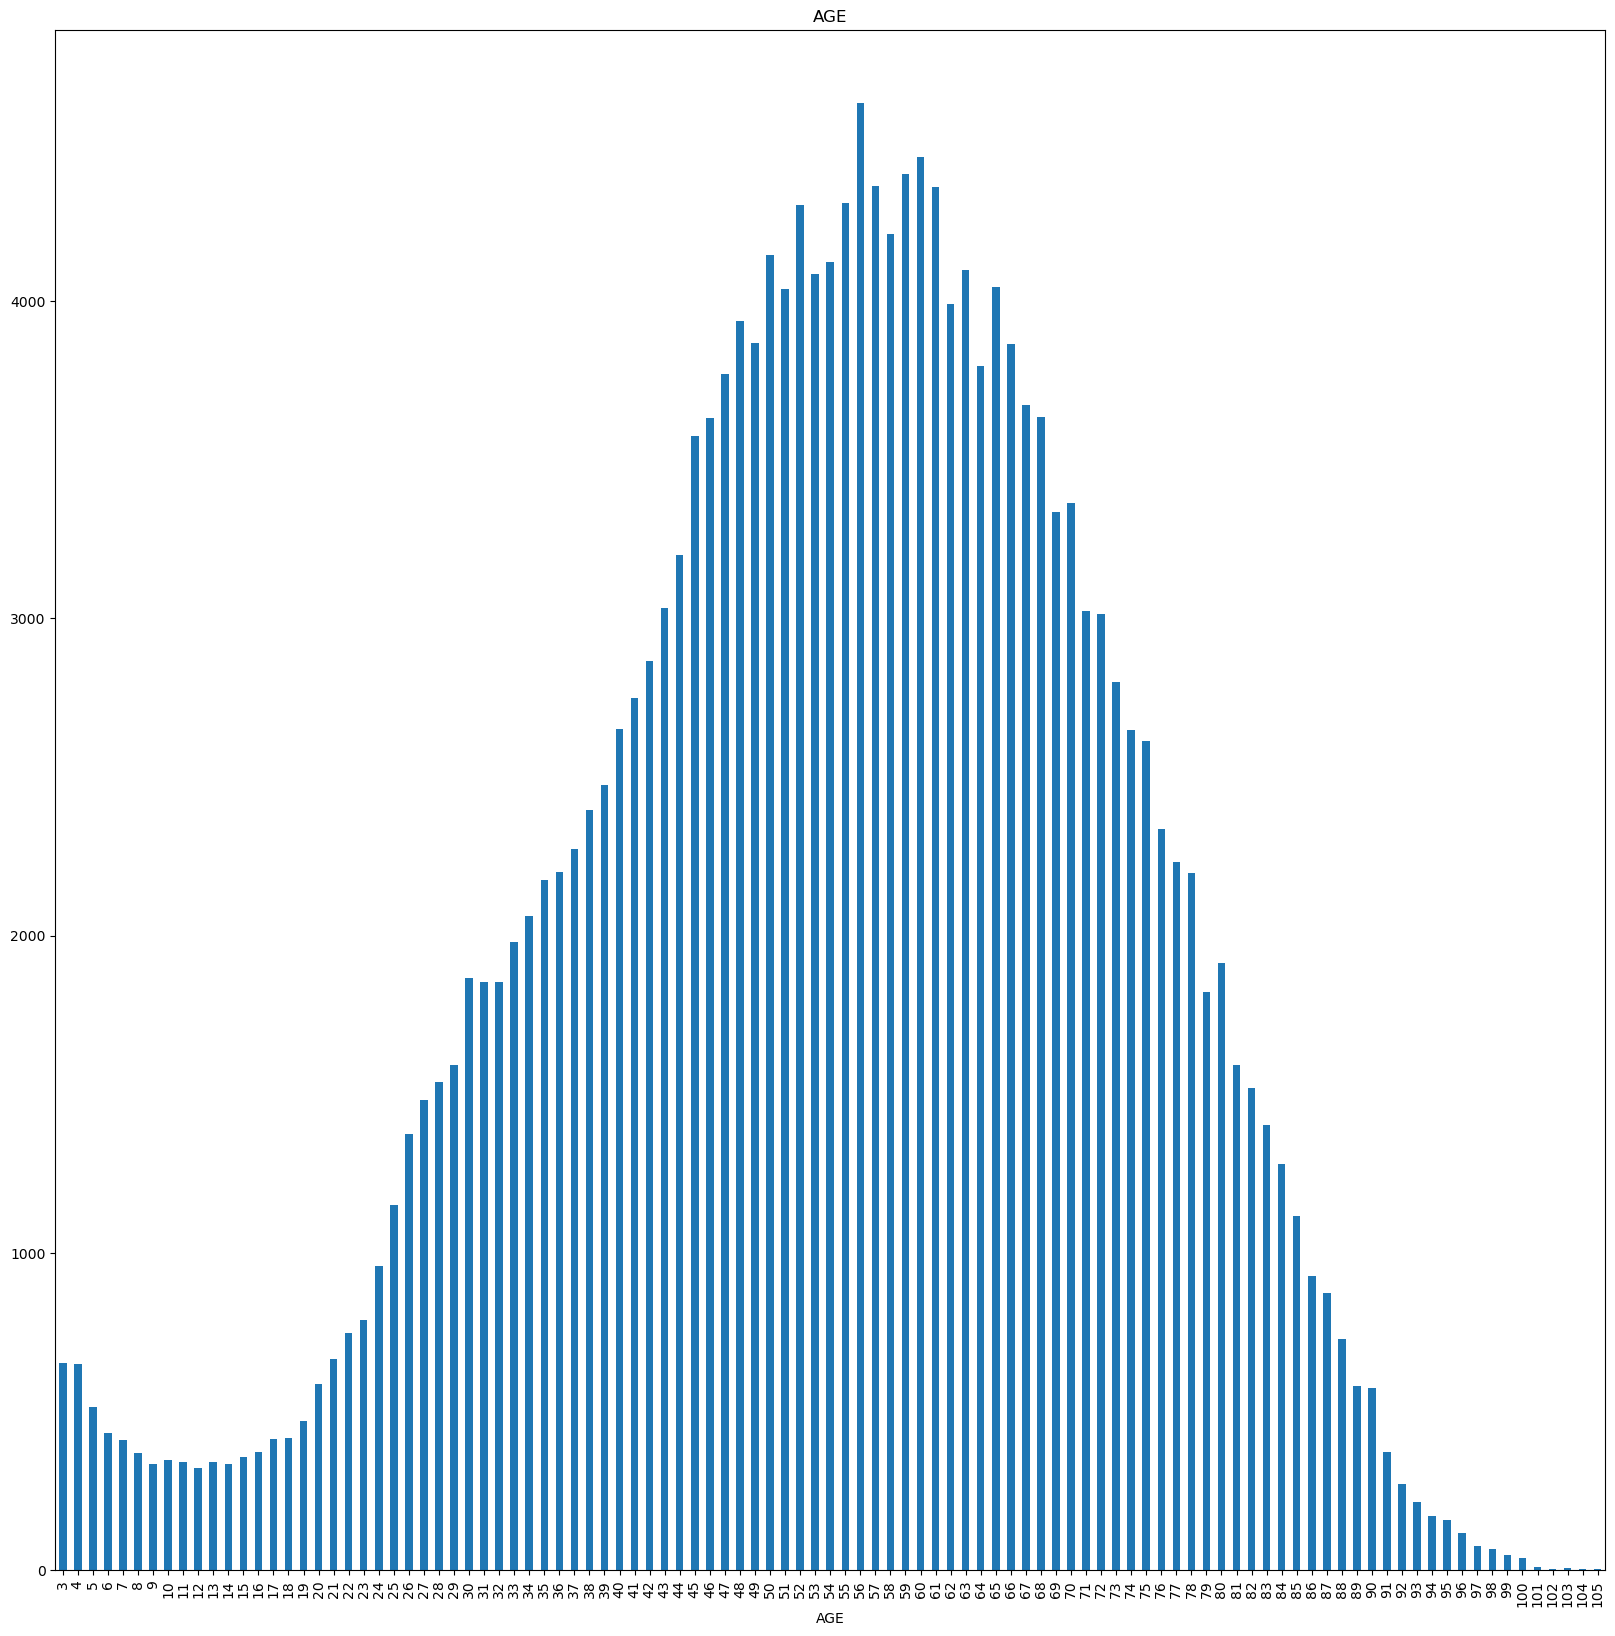

In [8]:
fig = plt.figure(figsize=(20,20)) 
df['AGE'].value_counts().sort_index().plot(kind='bar', title='AGE')